In [3]:
from tensorflow import keras
keras.__version__

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizing what convnets learn

이 노트북에는 [Python을 사용한 딥 러닝](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff) 의 5 장 섹션 4에있는 코드 샘플이 포함되어 있습니다. 원본 텍스트에는 훨씬 더 많은 내용, 특히 추가 설명 및 그림이 포함되어 있습니다.이 노트북에서는 소스 코드와 관련 주석 만 찾을 수 있습니다.

----

종종 딥 러닝 모델은 "블랙 박스"사람이 해석하기 어려운 학습 방법으로 소개됩니다. 이것은 특정 유형의 딥 러닝 모델에 부분적으로 해당되지만 convnet에는 해당되지 않습니다. convnet에 의해 학습된 표현은 _시각적 개념의 표현_ 이기 때문에 시각화에 매우 적합합니다. 2013 년부터 이러한 표현을 시각화하고 해석하기위한 다양한 기술이 개발되었습니다. 모두 소개하지는 않겠지만, 가장 접근하기 쉽고 유용한 세 가지를 다룰 것입니다.

* **중간 출력 결과물에 대한 시각화**: 초기의 인풋이 어떻게 처리되어 마지막 레이어까지 도달하게 되는지 이해하는 데 유용합니다.
* **Convnets 필터에 대한 시각화**: 필터가 어떠한 패턴들을 실제로 찾아내는지 이해하는 데 주요한 역할을 합니다.
* **Class Activation Map에 대한 시각화**: 어떠한 부분을 중점으로 처리해서 분류 결과가 나왔는지 이해하는 데 주요한 역할을 합니다.

## Visualizing intermediate activations

중간층의 활성화 시각화는 특정 입력이 주어진 경우 네트워크의 다양한 convolution 및 pooling layer에 의해 출력되는 피처 맵을 표시하는 것으로 구성됩니다 (레이어의 출력은 종종 activation 함수의 출력인 "activation"이라고 함). 이것은 입력이 네트워크에 의해 학습된 다른 필터로 분해되는 방법에 대한 해석을 제공합니다. 시각화하려는 feature map에는 너비, 높이 및 깊이 (채널)의 3 가지 차원이 있습니다. 각 채널은 상대적으로 독립적인 기능을 인코딩하므로 이러한 feature map을 시각화하는 적절한 방법은 모든 채널의 콘텐츠를 2D 이미지로 독립적으로 플로팅하는 것입니다.

In [4]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/Model/cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

다음은 우리가 입력 이미지로서 사용할 고양이 그림입니다.

In [5]:
from google.colab import files
files.upload()

Saving cat.1700.jpg to cat.1700.jpg


{'cat.1700.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01M\x01D\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8

In [6]:
img_path = 'cat.1700.jpg'

# We preprocess the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


그림을 그려보면 다음과 같습니다:

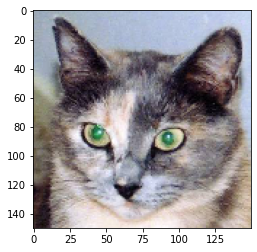

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

우리가보고 싶은 feature map을 추출하기 위해 이미지 배치를 입력으로 받아 모든 convolution 및 pooling layer의 activation 결과를 출력하는 Keras 모델을 생성합니다. 이를 위해 Keras 클래스 Model을 사용합니다. 모델은 입력 텐서 (또는 입력 텐서 목록)와 출력 텐서 (또는 출력 텐서 목록)의 두 인수를 사용하여 인스턴스화됩니다. 결과 클래스는 익숙한 Sequential 모델과 마찬가지로 지정된 입력을 지정된 출력에 매핑하는 Keras 모델입니다. Model 클래스의 특이한 점은 Sequential과 달리 여러 출력을 가진 모델을 허용한다는 것입니다.

In [8]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

이미지가 입력되면 이 모델은 원래 모델의 레이어 activation 값을 반환합니다. 다중 출력 모델을 처음 접하는 것은 이번이 처음입니다. 지금까지 본 모델에는 정확히 하나의 입력과 하나의 출력만 있었습니다. 일반적으로 모델은 입력과 출력을 얼마든지 가질 수 있습니다. 이것은 하나의 입력과 8 개의 출력, layer activation 당 하나의 출력을 가지고 있습니다.

In [9]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

다음은 첫번째 convolution layer의 activation 결과입니다:

In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


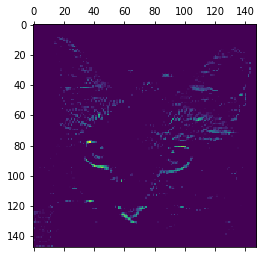

In [11]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')
plt.show()

현재 이 채널의 값은 대각선 탐지 역할을 합니다:

In [12]:
from tensorflow import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

여기서 흥미로운 점들은 다음과 같습니다:

* 첫번째 layer는 다양한 edge들을 찾는 detector 역할을 했습니다.
* 더 높은 층으로 가면 갈수록 형태들이 점점 더 추상화되가고 우리가 이해하기 힘든 형태가 됩니다.이 얘기는 상위 층으로 갈수록 좀 더 복잡한 개념들 예를 들어, 고양이의 귀, 눈, 입 등이 좀 더 단순한 변수로 표현된다는 의미입니다.
* 첫번째 layer에서는 모든 activation값들이 활성화된 것을 볼 수 있지만 층이 높아질 수록 활성화되지 않는 층들이 늘어갑니다.

우리는 위의 예제를 통해 딥러닝의 특성과 관련해 굉장히 중요한 사실을 확인할 수 있습니다. 딥러닝 모델은 층이 깊어지면 깊어질 수록 점점 더 추상화되고 압축된 변수들을 스스로 만들어내는 능력이 있다는 사실입니다. 이러한 특성은 고차원의 이미지 데이터를 마지막의 fully connected layer의 분류기에서 정확히 분류하는데 큰 기여를 합니다. 과거에는 이러한 차원 축소가 사람의 전문 지식에 근거하거나 각종 방법론들의 조합에 의해 해결되었습니다. 하지만 조합 최적의 방법을 찾아내기는 어려웠습니다. 딥러닝은 데이터를 입력해주면 효율적으로 차원축소를 해냅니다.

이는 실제 사람이 사물들을 인지하고 기억하는 방법과도 매우 유사합니다. 우리가 일상 생활을 할 때를 떠올려보면 어떠한 사물들을 마주하고 관찰한 다음에 사진을 찍듯이 자세한 형상과 이미지가 기억에 남지는 않습니다. 단지 대략적인 구성과 느낌들만 떠오를 뿐입니다. 우리의 뇌도 실제로 다양한 추상화를 통해 효율적으로 정보를 처리하고 저장하고 있는 것입니다.

## Visualizing convnet filters

convnets에서 학습 한 필터를 검증하는 또 다른 쉬운 방법은 각 필터가 반응해야하는 시각적 패턴을 시각화하는 것입니다. 이는 입력 공간에서 gradient descent를 적용함으로써 수행할 수 있습니다. 빈 입력 이미지에서 시작하여 특정 필터의 activation을 최대화하기 위해 convnet의 입력 이미지 값에 gradient descent 방법을 적용합니다. 결과 이미지는 선택한 필터가 최대로 반응하는 이미지가 됩니다.

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

with tf.GradientTape():
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

58900480/58889256 [==============================] - 1s 0us/step


gradient를 계산하기 위해서는 tensorflow GradientTape기능을 사용해서 계산합니다.

`iterate`라고 하는 함수는 model의 input을 입력받아서 loss와 gradient를 출력해주는 함수입니다:

In [14]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

Python loop를 이용해서 다음의 stochastic gradient descent를 수행합니다:

In [15]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

결과 이미지는 정확한 정수가 아닌 실수로 나오기 때문에 다음의 함수를 이용해 RGB array로 변형시켜 줍니다:

In [16]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

이제 모든 개별 요소들에 대한 구현은 완료되었고 다음의 종합 함수를 통해 우리가 원하는 결과를 만들어낼 수 있습니다:

In [17]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

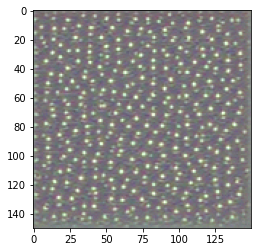

In [18]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

`block3_conv1`은 작은 점들에 반응하는 filter라는 사실을 알 수 있습니다.

우리는 이제 각 층의 layer들을 시각화 해볼 수 있습니다:

In [19]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results.astype('uint8'))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

이러한 필터 시각화는 convnet 계층이 세상을 보는 방식에 대해 많은 것을 알려줍니다. convnet의 각 계층은 단순히 필터 모음을 학습하여 입력이 필터 조합으로 표현 될 수 있도록 합니다. 이것은 푸리에 변환이 신호를 코사인 함수 뱅크로 분해하는 방법과 유사합니다. 이러한 convnet 필터는 모델에서 층이 더 높이 올라감에 따라 점점 더 복잡해지고 정교해집니다.

## Visualizing heatmaps of class activation

주어진 이미지의 어느 부분이 convnet을 최종 분류 결정으로 이끄는 지 이해하는 데 유용한 시각화 기술을 하나 더 소개합니다. 이는 특히 분류가 실패할 경우 convnet의 의사 결정 프로세스를 "디버깅"하는 데 유용합니다. 또한 이미지에서 특정 개체를 찾을 수 있습니다.

이 일반적인 방법은 "클래스 활성화 맵"(CAM) 시각화라고 하며 입력 이미지에 대한 "클래스 활성화" heatmap을 생성합니다. "클래스 활성화" heatmap은 입력 이미지의 모든 위치에 대해 계산된 특정 출력 클래스와 관련된 점수의 2D 그리드로, 분류된 클래스와 관련하여 각 위치가 얼마나 중요한지 나타냅니다. 예를 들어, "cat vs. dog"convnet 중 하나에 이미지가 제공된 경우 Class Activation Map 시각화를 통해 "cat"클래스에 대한 heatmap을 생성하여 이미지의 다양한 영역이 고양이와 얼마나 유사한 지 표시 할 수 있습니다.

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
#K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 9s 0us/step


다음의 두 마리 코끼리 그림에 대해서 적용해본다:

![elephants](https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg)

In [21]:
from google.colab import files
files.upload()

Saving creative_commons_elephant.jpg to creative_commons_elephant.jpg


{'creative_commons_elephant.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00\x8cExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\x83\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02X\x00\x00\x00\x00\xff\xed\x008Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xd4\x1d\x8c\xd9\x8f\x00\xb2\x04\xe9\x80\t\x98\xec\xf8B~\xff\xc0\x00\x11\x08\x02X\x03\x83\x03\x01\x12\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x0

In [22]:
# The local path to our target image
img_path = 'creative_commons_elephant.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [23]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.90942174), ('n01871265', 'tusker', 0.086182125), ('n02504013', 'Indian_elephant', 0.004354569)]



이 이미지에 대한 Top 3 분류 결과는 다음과 같다:

* African elephant (with 90.94% probability)
* Tusker (with 8% probability)
* Indian elephant (with 0.4% probability)

In [24]:
np.argmax(preds[0])

386

Grad-CAM을 이용해서 african elephant에 가장 연관이 있는 부분을 찾는다:

In [25]:
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

Heatmap을 normalize한다:

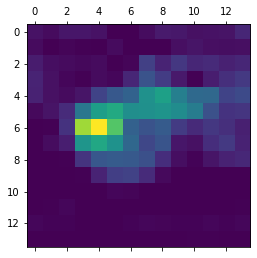

In [26]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

최종적으로 opencv를 이용해서 시각화하면 다음과 같다:

In [27]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('creative_commons_elephant_gradcam.png', superimposed_img)

True

![elephant cam](https://s3.amazonaws.com/book.keras.io/img/ch5/elephant_cam.jpg)